# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = ""
units = "imperial"


In [4]:
city_url = cities[0]
query_url = f"{url}appid={weather_api_key}&q={city_url}&units={units}"
weather_response = requests.get(query_url).json()

In [5]:
#testing retrieval to see data structure
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1603494751,
 'id': 3831208,
 'main': {'feels_like': 9.09,
          'grnd_level': 1006,
          'humidity': 92,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 18.82,
          'temp_max': 18.82,
          'temp_min': 18.82},
 'name': 'Qaanaaq',
 'sys': {'country': 'GL', 'sunrise': 1603462686, 'sunset': 1603477499},
 'timezone': -10800,
 'visibility': 3624,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 79, 'speed': 7.92}}


In [6]:
city_list = []
clouds = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lon = []

In [7]:
#user output
print("Beginning Data Retrieval")
print("----------------------------")
record_num = 0
for x in range(len(cities)):
    try:
        city_url = cities[x]
        query_url = f"{url}appid={weather_api_key}&q={city_url}&units=imperial"
        weather_response = requests.get(query_url).json()
        city_list.append(weather_response['name'])
        clouds.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        record_num += 1
        print(f"Processing Record {record_num} | {weather_response['name']}")
    except KeyError:
        print("City not found. Skipping...")
        record_num -= 1

Beginning Data Retrieval
----------------------------
Processing Record 1 | Qaanaaq
Processing Record 2 | Bredasdorp
Processing Record 3 | Morehead
City not found. Skipping...
Processing Record 3 | Santa Rosa
Processing Record 4 | Hobyo
Processing Record 5 | Mataura
Processing Record 6 | Kapaa
Processing Record 7 | Chernyshevskiy
City not found. Skipping...
Processing Record 7 | Pevek
Processing Record 8 | Hilo
Processing Record 9 | Touros
Processing Record 10 | Luanda
Processing Record 11 | Sampit
Processing Record 12 | Rikitea
Processing Record 13 | Jamestown
Processing Record 14 | Beloha
Processing Record 15 | Pangnirtung
Processing Record 16 | Puerto Ayora
Processing Record 17 | Bluff
City not found. Skipping...
Processing Record 17 | Terrace
Processing Record 18 | New Norfolk
Processing Record 19 | Oistins
Processing Record 20 | Ust-Nera
Processing Record 21 | Linjiang
City not found. Skipping...
Processing Record 21 | Saint-Philippe
Processing Record 22 | Flinders
Processing Reco

Processing Record 208 | Ulaangom
Processing Record 209 | Mount Isa
Processing Record 210 | Iwo
Processing Record 211 | Nome
Processing Record 212 | Buraidah
Processing Record 213 | Camocim
Processing Record 214 | Ponta do Sol
Processing Record 215 | Atherton
Processing Record 216 | Baruun-Urt
Processing Record 217 | Ambilobe
Processing Record 218 | Teseney
Processing Record 219 | Acaraú
Processing Record 220 | Itamaraju
Processing Record 221 | Laibin
Processing Record 222 | Lagoa
Processing Record 223 | Dakar
Processing Record 224 | Camacha
Processing Record 225 | Taunggyi
City not found. Skipping...
Processing Record 225 | Saint-Leu
Processing Record 226 | Rawson
Processing Record 227 | Chapais
Processing Record 228 | Vardø
Processing Record 229 | Ilulissat
Processing Record 230 | Namatanai
Processing Record 231 | Ventimiglia
Processing Record 232 | Nuevitas
City not found. Skipping...
Processing Record 232 | Fukuechō
Processing Record 233 | Ponta Delgada
Processing Record 234 | Lavre

Processing Record 418 | Kumluca
Processing Record 419 | San Fernando del Valle de Catamarca
Processing Record 420 | Abonnema
Processing Record 421 | Douentza
City not found. Skipping...
Processing Record 421 | Palana
Processing Record 422 | Dire Dawa
Processing Record 423 | Bulawayo
Processing Record 424 | Hermiston
Processing Record 425 | Baykit
Processing Record 426 | Wahiawā
Processing Record 427 | Vallenar
Processing Record 428 | Nevel'sk
Processing Record 429 | Kungurtug
City not found. Skipping...
Processing Record 429 | Sarapul
City not found. Skipping...
Processing Record 429 | Dzhebariki-Khaya
Processing Record 430 | Makakilo City
Processing Record 431 | Tomatlán
Processing Record 432 | Kenai
Processing Record 433 | Saint Anthony
Processing Record 434 | Klaksvík
Processing Record 435 | Cacheu
Processing Record 436 | Uyskoye
Processing Record 437 | Eureka
Processing Record 438 | Ereymentau
Processing Record 439 | Collie
Processing Record 440 | Whitehorse
Processing Record 441 |

In [8]:
#existing example

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
base_df = pd.DataFrame({"City": city_list,
                       "Cloudiness": clouds,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lon,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed
                       })

In [10]:
base_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,98,GL,1603494751,92,77.48,-69.36,18.82,7.92
1,Bredasdorp,31,ZA,1603494700,93,-34.53,20.04,66.20,0.87
2,Morehead,90,US,1603494889,88,37.27,-87.18,66.20,10.29
3,Santa Rosa,40,PH,1603494890,94,14.31,121.11,79.00,2.24
4,Hobyo,100,SO,1603494890,73,5.35,48.53,82.24,20.07


In [11]:
#user result
base_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [12]:
#provided

In [13]:
base_df.to_csv('city_weather_data.csv')

In [14]:
#user output
file = 'city_weather_data.csv'
file_df = pd.read_csv(file, index_col=0)
file_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,98,GL,1603494751,92,77.48,-69.36,18.82,7.92
1,Bredasdorp,31,ZA,1603494700,93,-34.53,20.04,66.20,0.87
2,Morehead,90,US,1603494889,88,37.27,-87.18,66.20,10.29
3,Santa Rosa,40,PH,1603494890,94,14.31,121.11,79.00,2.24
4,Hobyo,100,SO,1603494890,73,5.35,48.53,82.24,20.07


In [15]:
#provided output

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

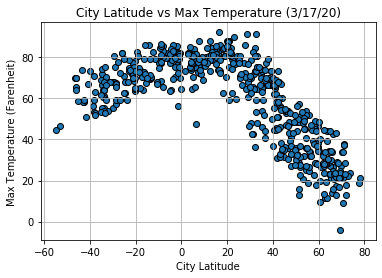

In [16]:
#user output
lat_temp_chart = plt.scatter(base_df['Lat'],base_df['Max Temp'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Max Temperature (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.savefig('Latitude_vs_Temp_all')
plt.show()
#Temperatures peak around the equator, and are hotter below the equator for the same distance. 

In [17]:
#provided output

#### Latitude vs. Humidity Plot

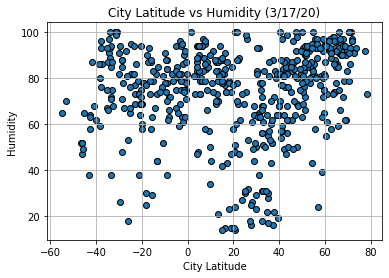

In [18]:
#user output
lat_hum_chart = plt.scatter(base_df['Lat'],base_df['Humidity'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Humidity (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.savefig('Latitude_vs_Humidity_all')
plt.show()
#There is no clear trend in with latitude & humidity

In [19]:
#provided output

#### Latitude vs. Cloudiness Plot

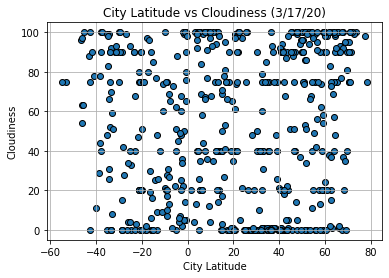

In [20]:
#user output
lat_cloud_chart = plt.scatter(base_df['Lat'],base_df['Cloudiness'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Cloudiness (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.savefig('Latitude_vs_Cloudiness_all')
plt.show()
#"Cloudiness" tends to be measured more often in multiples of 10

In [21]:
#provided output

#### Latitude vs. Wind Speed Plot

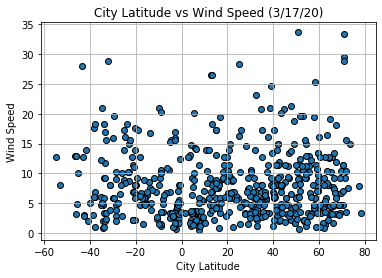

In [22]:
#user output
lat_wind_chart = plt.scatter(base_df['Lat'],base_df['Wind Speed'],edgecolors='k')
plt.grid(which='both', axis='both')
plt.title("City Latitude vs Wind Speed (3/17/20)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.savefig('Latitude_vs_Wind_all')
plt.show()
#Wind speed seems to trend higher as latitude moves away from the equator, particularly to the north

In [23]:
#provided output

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x,y):
    plt.scatter(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}.")
    

In [25]:
# Create Northern and Southern Hemisphere DataFrames
north_df = base_df.loc[base_df['Lat'] > 0]
south_df = base_df.loc[base_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8708504102548194.


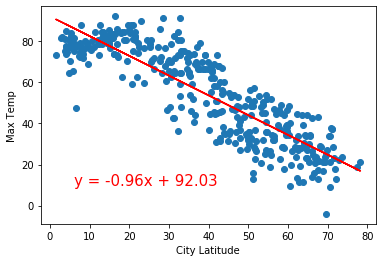

In [26]:
#user output
lin_reg(north_df['Lat'],north_df['Max Temp'])
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")
plt.savefig('Latitude_vs_Temp_northhemi')
plt.show()

In [27]:
#provided output

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6460779900902837.


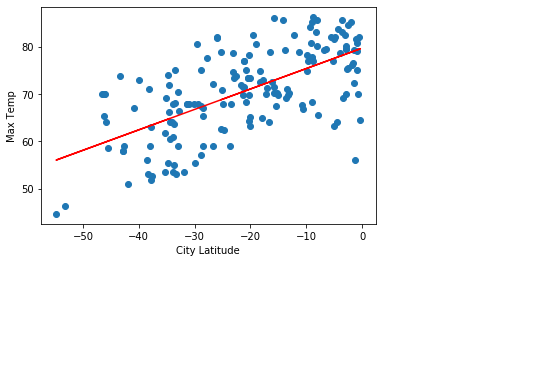

In [28]:
#user output
lin_reg(south_df['Lat'],south_df['Max Temp'])
plt.xlabel("City Latitude")
plt.ylabel("Max Temp")
plt.savefig('Latitude_vs_Temp_southhemi')
plt.show()

In [29]:
#provided output

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2598478962959725.


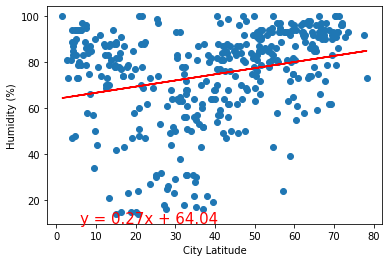

In [30]:
#user output
lin_reg(north_df['Lat'],north_df['Humidity'])
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Latitude_vs_Humidity_northhemi')
plt.show()

In [31]:
#provided output

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10132067584342484.


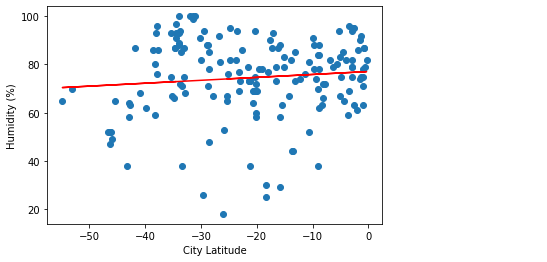

In [32]:
#user output
lin_reg(south_df['Lat'],south_df['Humidity'])
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Latitude_vs_Humidity_southhemi')
plt.show()

In [33]:
#provided output

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1580785203784907.


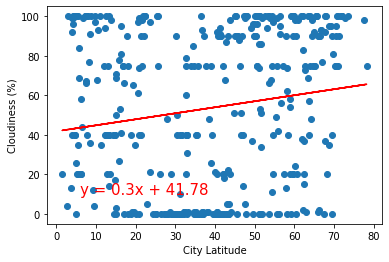

In [34]:
#user output
lin_reg(north_df['Lat'],north_df['Cloudiness'])
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Latitude_vs_Clouds_northhemi')
plt.show()

In [35]:
#provided output

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.22222775211749912.


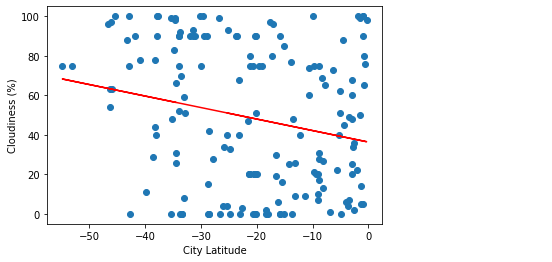

In [36]:
#user output
lin_reg(south_df['Lat'],south_df['Cloudiness'])
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Latitude_vs_Clouds_southhemi')
plt.show()

In [37]:
#provided output

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09237208722333412.


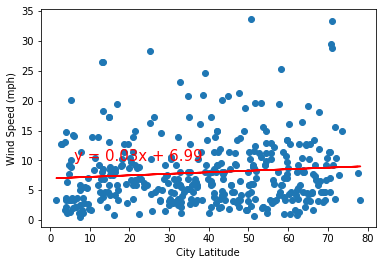

In [38]:
#user output
lin_reg(north_df['Lat'],north_df['Wind Speed'])
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Latitude_vs_wind_northhemi')
plt.show()

In [39]:
#provided output

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22222775211749912.


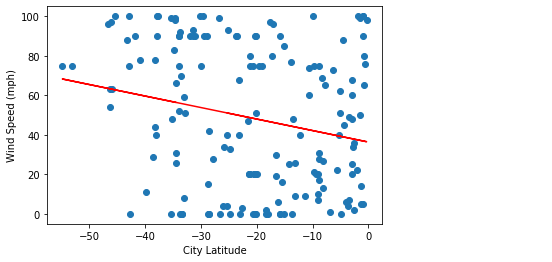

In [40]:
#user output
lin_reg(south_df['Lat'],south_df['Cloudiness'])
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Latitude_vs_wind_southhemi')
plt.show()

In [41]:
#provided output